In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

train_path = r"C:\Users\admin\Desktop\Python\Face recognition\Train_Dataset"
valid_path = r'C:\Users\admin\Desktop\Python\Face recognition\Validation_Dataset'
image_size = (224,224)
batch_size = 32
# img = cv2.imread(path)
# print(img)
# plt.imshow(path)
# Step 2: Load the dataset
train = ImageDataGenerator(rescale=1./255)
validation = ImageDataGenerator(rescale=1./255)
# print(train)
train_dataset = train.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

valid_dataset = validation.flow_from_directory(
    valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

print(train_dataset.samples)
train_dataset.class_indices



Found 87 images belonging to 2 classes.
Found 21 images belonging to 2 classes.
87


{'Surose': 0, 'suresh1': 1}

In [22]:

conv_base = ResNet50(weights='imagenet', include_top=False,input_shape=(224,224,3))
conv_base.trainable = False
# conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(len(train_dataset.class_indices),activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_7 (Dense)             (None, 256)               25690368  
                                                                 
 dense_8 (Dense)             (None, 2)                 514       
                                                                 
Total params: 49278594 (187.98 MB)
Trainable params: 25690882 (98.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [25]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_dataset,
    # steps_per_epochs=train_dataset.samples//batch_size,
    epochs=10,
    validation_data = valid_dataset,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
    # validation_steps=valid_dataset.samples//batch_size
    )
    

Epoch 1/10
3/3 [==============================] - 122s 42s/step - loss: 20.4625 - accuracy: 0.5632 - val_loss: 4.0427 - val_accuracy: 0.4286
Epoch 2/10
3/3 [==============================] - 58s 15s/step - loss: 3.0521 - accuracy: 0.3908 - val_loss: 1.1309 - val_accuracy: 0.5714
Epoch 3/10
3/3 [==============================] - 50s 16s/step - loss: 1.1491 - accuracy: 0.6092 - val_loss: 1.6126 - val_accuracy: 0.5714
Epoch 4/10
3/3 [==============================] - 46s 16s/step - loss: 0.9372 - accuracy: 0.5862 - val_loss: 1.3301 - val_accuracy: 0.3810
Epoch 5/10
3/3 [==============================] - 43s 15s/step - loss: 0.8285 - accuracy: 0.5057 - val_loss: 0.9386 - val_accuracy: 0.5714
Epoch 6/10
3/3 [==============================] - 46s 16s/step - loss: 0.6326 - accuracy: 0.6092 - val_loss: 1.1118 - val_accuracy: 0.5714
Epoch 7/10
3/3 [==============================] - 44s 15s/step - loss: 0.5624 - accuracy: 0.6667 - val_loss: 1.1158 - val_accuracy: 0.2381
Epoch 8/10
3/3 [=========

In [ ]:
print(history.history['accuracy'])


[0.694915235042572, 0.5423728823661804, 0.6610169410705566, 0.6864407062530518, 0.694915235042572, 0.7796609997749329, 0.7372881174087524, 0.7796609997749329, 0.8389830589294434, 0.8389830589294434]


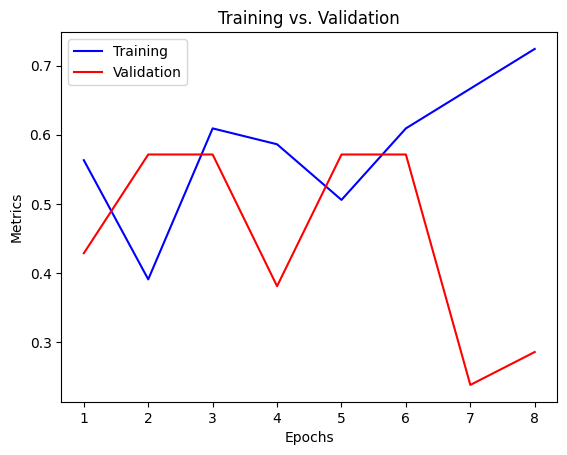

In [26]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training')
plt.plot(epochs, val_accuracy, 'r', label='Validation')
plt.title('Training vs. Validation')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

[20.46254539489746, 3.0520646572113037, 1.1490875482559204, 0.9372192025184631, 0.8285256028175354, 0.6326223611831665, 0.5623790621757507, 0.569191038608551]
[4.042736530303955, 1.1309263706207275, 1.612632155418396, 1.3300564289093018, 0.9386276006698608, 1.1118015050888062, 1.1157941818237305, 1.0621511936187744]


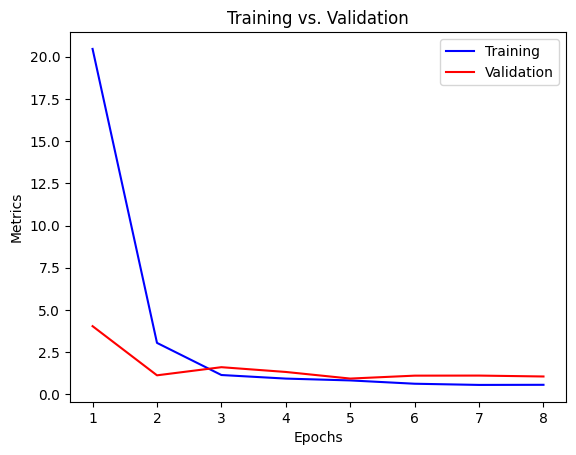

In [27]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
print(train_loss)
val_loss = history.history['val_loss']
print(val_loss)
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training')
plt.plot(epochs, val_loss, 'r', label='Validation')
plt.title('Training vs. Validation')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()
